In [ ]:
!pip install yfinance
import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yfin
import pandas as pd
yfin.pdr_override()


In [ ]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2014-01-01", end="2021-10-31")
ETH = pdr.get_data_yahoo("ETH-USD", start="2014-01-01", end="2021-10-31")
DOGE = pdr.get_data_yahoo("DOGE-USD", start="2014-01-01", end="2021-10-31")
SP5 = pdr.get_data_yahoo("^GSPC", start="2014-01-01", end="2021-10-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
BTC.reset_index(level=0, inplace=True)
ETH.reset_index(level=0, inplace=True)
DOGE.reset_index(level=0, inplace=True)
SP5.reset_index(level=0, inplace=True)

In [ ]:
print(BTC.head(1))
print(ETH.head(1))
print(DOGE.head(1))
print(SP5.head(1))

        Date        Open        High  ...       Close   Adj Close    Volume
0 2014-09-17  465.864014  468.174011  ...  457.334015  457.334015  21056800

[1 rows x 7 columns]
        Date     Open     High      Low    Close  Adj Close  Volume
0 2015-08-07  2.83162  3.53661  2.52112  2.77212    2.77212  164329
        Date      Open      High      Low     Close  Adj Close   Volume
0 2014-09-17  0.000293  0.000299  0.00026  0.000268   0.000268  1463600
        Date         Open         High  ...       Close   Adj Close      Volume
0 2014-01-02  1845.859985  1845.859985  ...  1831.97998  1831.97998  3080600000

[1 rows x 7 columns]


In [ ]:
Merged = SP5.merge(ETH, how = 'outer', on = "Date")
Merged = Merged.merge(DOGE, how = 'outer', on = "Date")
Merged = Merged.merge(BTC, how = 'outer', on = "Date")


In [ ]:
Merged.head(10)

,Date,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y,Open_x,High_x,Low_x,Close_x,Adj Close_x,Volume_x,Open_y,High_y,Low_y,Close_y,Adj Close_y,Volume_y
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3.080600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2.774270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3.294850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3.511750e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3.652140e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3.581150e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3.335710e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3.591350e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3.353270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-15,1840.520020,1850.839966,1840.520020,1848.380005,1848.380005,3.777800e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
SP5.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1972.000000,1972.000000,1972.000000,1972.000000,1972.000000,1.972000e+03
mean,2667.990309,2680.976512,2653.910249,2668.500151,2668.500151,3.791833e+09
std,696.244198,699.639608,693.241960,696.790408,696.790408,9.629229e+08
min,1743.819946,1755.790039,1737.920044,1741.890015,1741.890015,1.296540e+09
25%,2083.767517,2093.772522,2075.567566,2083.947571,2083.947571,3.221038e+09
50%,2564.695068,2576.864990,2548.130005,2561.680054,2561.680054,3.578955e+09
75%,2975.230042,2987.840027,2961.185059,2976.642578,2976.642578,4.096895e+09
max,4580.220215,4608.080078,4569.169922,4605.379883,4605.379883,9.878040e+09


In [ ]:
Merged.columns = ["Date","Open_SP5",	'High_SP5'	,'Low_SP5',	'Close_SP5',	'Adj_Close_SP5','Volume_SP5',"Open_ETH",	'High_ETH'	,'Low_ETH',	'Close_ETH',	'Adj_Close_ETH','Volume_ETH',"Open_DOGE",	'High_DOGE'	,'Low_DOGE',	'Close_DOGE',	'Adj_Close_DOGE','Volume_BTC',"Open_BTC",	'High_BTC'	,'Low_BTC',	'Close_BTC',	'Adj_Close_BTC','Volume_BTC']

In [ ]:
Merged.head(10)

,Date,Open_SP5,High_SP5,Low_SP5,Close_SP5,Adj_Close_SP5,Volume_SP5,Open_ETH,High_ETH,Low_ETH,Close_ETH,Adj_Close_ETH,Volume_ETH,Open_DOGE,High_DOGE,Low_DOGE,Close_DOGE,Adj_Close_DOGE,Volume_BTC,Open_BTC,High_BTC,Low_BTC,Close_BTC,Adj_Close_BTC,Volume_BTC
0,2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3.080600e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2.774270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3.294850e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3.511750e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3.652140e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3.581150e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3.335710e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3.591350e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3.353270e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-01-15,1840.520020,1850.839966,1840.520020,1848.380005,1848.380005,3.777800e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Testing Append Merge 

BTC2=BTC.copy()
ETH2=ETH.copy()
DOGE2=DOGE.copy()
SP52=SP5.copy()

BTC2['asset']='BTC'
ETH2['asset']='ETH'
DOGE2['asset']='DOGE'
SP52['asset']='SP5'


In [ ]:
#Making a data frame of the closing price for utilizing percent change of the dataframe. c1 is for change dataframe. 

Merged.columns

c1_col=['Date','Adj_Close_SP5','Adj_Close_ETH','Adj_Close_DOGE','Adj_Close_BTC']

c1=Merged[c1_col]


c1['Date']=pd.to_datetime(c1.Date)





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
#printing c1 to see if it is converting to date. 

c1 = c1.sort_values('Date')

In [ ]:
 #Settinng index to date 
 
 c1 =c1.set_index(c1['Date'])

In [ ]:
#dropping the date column 
c1 =c1.drop('Date',axis=1)


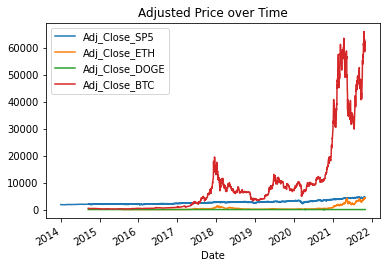

In [ ]:
c1.plot(title="Adjusted Price over Time")

In [ ]:
#made new percent change df to limit constant recalculation. 

pc1= c1.pct_change(fill_method='ffill')




In [ ]:
pc1=pc1*100

In [ ]:
#Setting up a new data frame to evalyate more recent (past 2 years) price movements. 
#Commenting out this step will 

pc1 = pc1.loc['2019-10-31':'2021-10-31']

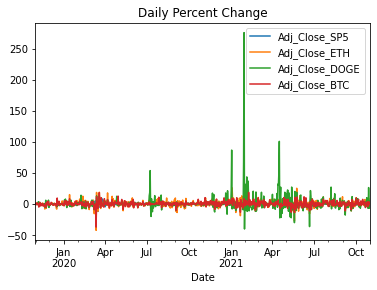

In [ ]:
pc1.plot(title='Daily Percent Change')

In [ ]:
#calculating correlation of the percent change columns.


corr = pc1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Adj_Close_SP5,1.000000,0.298257,0.048475,0.306851
Adj_Close_ETH,0.298257,1.000000,0.282551,0.796178
Adj_Close_DOGE,0.048475,0.282551,1.000000,0.312603
Adj_Close_BTC,0.306851,0.796178,0.312603,1.000000


Text(0.5, 1.0, 'Histogram of Daily Percent Change: Oct 2019 - Oct 2021')

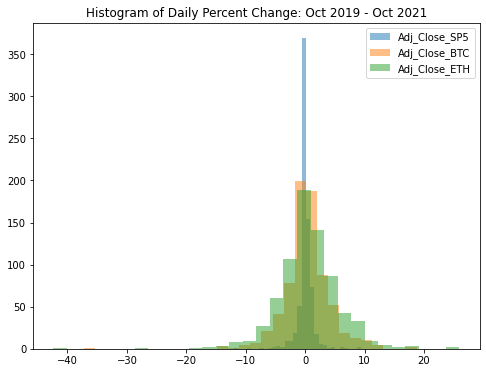

In [ ]:
#Creating multiple histograms. Can see from the plots below that eth and BTC 
#have significantly more volatility. 
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.hist(pc1['Adj_Close_SP5'], bins=30, alpha=.5, label='Adj_Close_SP5');
plt.hist(pc1['Adj_Close_BTC'], bins=30, alpha=.5, label='Adj_Close_BTC');
plt.hist(pc1['Adj_Close_ETH'], bins=30, alpha=.5, label='Adj_Close_ETH');
plt.legend()
plt.title('Histogram of Daily Percent Change: Oct 2019 - Oct 2021')

#plt.hist(pc1['Adj Close_DOGE'], bins=30, alpha=.5, label='Adj Close_DOGE');
#took out doge because distorted plot. 
#asking max if a power transformation would be appropriate here. 

In [ ]:
#daily variance is much higher for ETH, BTC DOGE. Approx 6-10 percent. 
pc1.describe()

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
count,732.000000,732.000000,732.000000,732.000000
mean,0.065599,0.572328,1.212792,0.339902
std,1.347426,5.238155,13.848363,3.948297
min,-11.984055,-42.347221,-40.256986,-37.169539
25%,-0.113157,-1.872188,-2.242865,-1.444663
50%,0.000000,0.470788,0.000000,0.203151
75%,0.418236,3.183519,2.031059,2.044688
max,9.382774,25.947533,275.643160,18.746474


In [ ]:
pc1.shape

(732, 4)

In [ ]:
import seaborn as sns

pc_hm = pc1

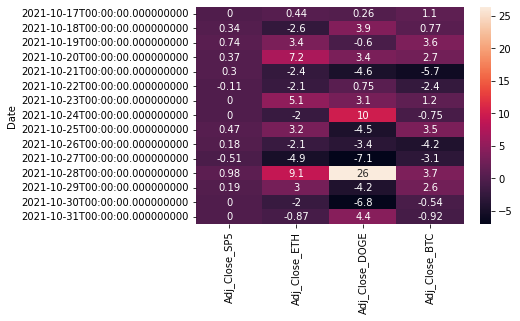

In [ ]:


sns.heatmap(pc_hm.tail(15), annot=True)

In [ ]:
pc_hm

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Date,,,,
2019-10-31,-0.302286,-0.392681,-0.038227,-0.066715
2019-11-01,0.966231,0.001617,0.573618,0.668721
2019-11-02,0.000000,-0.024012,-0.114069,0.686887
2019-11-03,0.000000,-0.815928,0.380665,-0.958348
2019-11-04,0.370409,2.154406,-0.872201,1.919340
...,...,...,...,...
2021-10-27,-0.505157,-4.861771,-7.055041,-3.116779
2021-10-28,0.982928,9.084940,26.402871,3.658794
2021-10-29,0.194933,2.972201,-4.191749,2.648914


Section below is in progress to subset the overall data set when the SP500 has a significant negative movement. 

In [ ]:
#Subsetting the SP5 data for when there is a significant drop. This helps evaluation if eth, btc are really 
#counter cyclical. 3 standard deviations away from mean would be considered a very large drop. 

SP5_sdev=-3*pc1['Adj_Close_SP5'].std()

pc1[pc1.Adj_Close_SP5 < SP5_sdev]

pc2=pc1

pc2['num']=range(0,pc2.shape[0])



In [ ]:
neg_days= pc2.num[pc2.Adj_Close_SP5<SP5_sdev]



In [ ]:
neg_days

Date
2020-02-27    119
2020-03-09    130
2020-03-11    132
2020-03-12    133
2020-03-16    137
2020-03-18    139
2020-03-20    141
2020-04-01    153
2020-06-11    224
Name: num, dtype: int64

In [ ]:
def twendays(x):
  l1=list(range(x,x+20))
  return(l1)

neg_days_value =neg_days.apply(twendays)

import itertools

neg_days_index=list(itertools.chain.from_iterable(neg_days_value))

In [ ]:
neg_days_value[0]


[119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138]

In [ ]:
#Subsetting for when the sp 500 is 3 standard deviations negative. 

pc_s =pc2.iloc[neg_days_index]
pc_s =pc_s.drop('num',axis=1,)

In [ ]:
pc_s = pc_s[pc_s.index.duplicated(keep='first')]

In [ ]:
#Calculating the correlation an alternative way, as a subset of the data for the 20 days after an SP500 dowturn. 

twen_corrs=[]

for x in range(0,neg_days_value.size):
  z= pc2.iloc[neg_days_value[x]].corr()
  twen_corrs.append(z.iloc[3,0])

sum(twen_corrs)/len(twen_corrs)


In [ ]:
#Getting an average of the correlations across time. 
#Based on row patterns. 
ETH_t_crr =0.5395336899458966
BTC_corr= 0.492069949945664

In [ ]:
#Dropping number column for correlation. Correlation is much greater when 

pcs_corr =pc_s.corr()
pcs_corr.style.background_gradient(cmap='coolwarm')

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Adj_Close_SP5,1.000000,0.545771,0.490880,0.510380
Adj_Close_ETH,0.545771,1.000000,0.938959,0.951827
Adj_Close_DOGE,0.490880,0.938959,1.000000,0.951436
Adj_Close_BTC,0.510380,0.951827,0.951436,1.000000


Text(0.5, 1.0, 'Significant SP500 Drop and Percent Change: : Oct 2019 - Oct 2021')

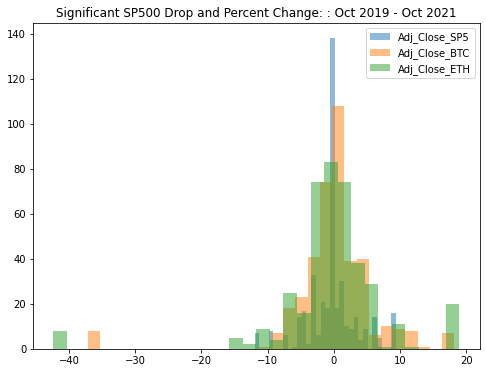

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(pc_s['Adj_Close_SP5'], bins=30, alpha=.5, label='Adj_Close_SP5');
plt.hist(pc_s['Adj_Close_BTC'], bins=30, alpha=.5, label='Adj_Close_BTC');
plt.hist(pc_s['Adj_Close_ETH'], bins=30, alpha=.5, label='Adj_Close_ETH');
plt.legend()
plt.title('Significant SP500 Drop and Percent Change: : Oct 2019 - Oct 2021')

#looks like more negative downside present in the tails of eth and btc distributions. 

In [ ]:
pc_s.describe()

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
count,400.000000,400.000000,400.000000,400.000000
mean,-0.180285,-0.383303,-0.241836,-0.138417
std,3.866471,8.519571,5.679789,7.084033
min,-11.984055,-42.347221,-29.624548,-37.169539
25%,-1.705385,-2.823472,-1.604869,-1.776528
50%,0.000000,0.052600,0.000000,0.010751
75%,1.153501,2.629432,1.234577,2.381609
max,9.382774,18.940401,13.218387,18.187756


In [ ]:
pc_s

,Adj_Close_SP5,Adj_Close_ETH,Adj_Close_DOGE,Adj_Close_BTC
Date,,,,
2020-02-24,-3.351363,-3.118754,-3.358209,-2.764274
2020-02-25,-3.028000,-6.560240,-4.401542,-3.196520
2020-02-26,-0.377854,-8.932913,-5.533113,-5.579095
2020-02-27,-4.416324,0.475505,-0.641305,-0.408460
2020-02-28,-0.823834,0.003136,-1.506026,-1.275418
...,...,...,...,...
2020-11-12,-0.997853,-0.422339,0.361144,3.662133
2020-11-13,1.361034,2.954664,1.511338,0.254755
2020-11-14,0.000000,-3.050103,-1.701529,-1.530046


General Time series predictions

Rolling Averages over x days

Using days as a hyper parameter and finding how long it takes the markets to react to a large change

Taking recency into account as well, How does correlation look within the last year vs last 5 year

Outside parameters